In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
df = df.dropna()

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_enc.fit_transform(df[col])

In [10]:
X = df.drop('RainTomorrow', axis=1)  
y = df['RainTomorrow'] 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8451790145338532

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      8799
           1       0.74      0.46      0.57      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.71      0.74     11284
weighted avg       0.83      0.85      0.83     11284



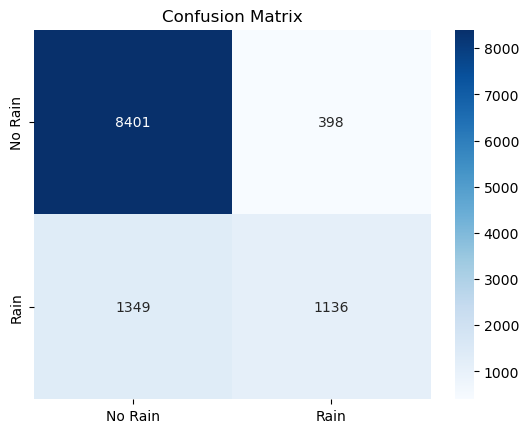

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'])
plt.title("Confusion Matrix")
plt.show()

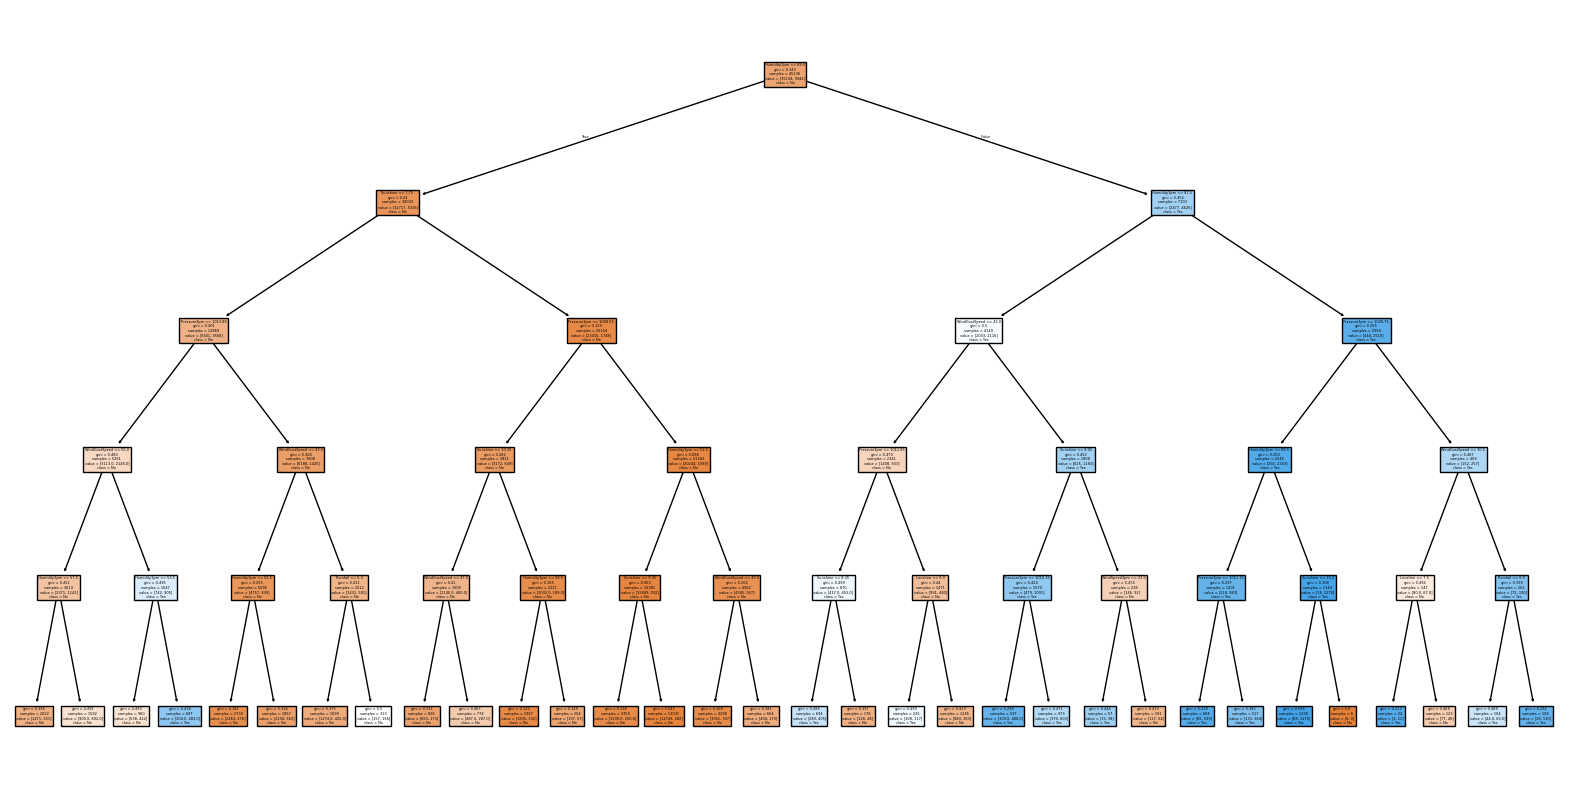

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()